In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load crime data from containing folder
crime_data = pd.read_csv("/home/usman/Desktop/Foundation of ML/all/train.csv")

In [3]:
#Rename some columns for clear understanding
crime_data.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)

In [4]:
#Separate the Date & Time column into two separate columns
crime_data[['Date', 'Time']]=pd.DataFrame(crime_data.Dates.str.split(' ',).tolist(), columns=['Date', 'Time'])

In [5]:
#Get the number of unique observation in each column
crime_data.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
longitude      34243
latitude       34243
Date            2249
Time            1439
dtype: int64

In [6]:
#Cross tabulation of DayOfWeek and Category columns
cross_days_and_cat = pd.crosstab(index=crime_data['DayOfWeek'], columns=crime_data['Category'])

In [7]:
#Cross tabulation of PdDistrict and Category columns
cross_pd_and_cat = pd.crosstab(index=crime_data['PdDistrict'], columns=crime_data['Category'])

In [8]:
#Cross tabulation of Resolution and Category columns
cross_res_and_cat = pd.crosstab(index=crime_data['Resolution'], columns=crime_data['Category'])

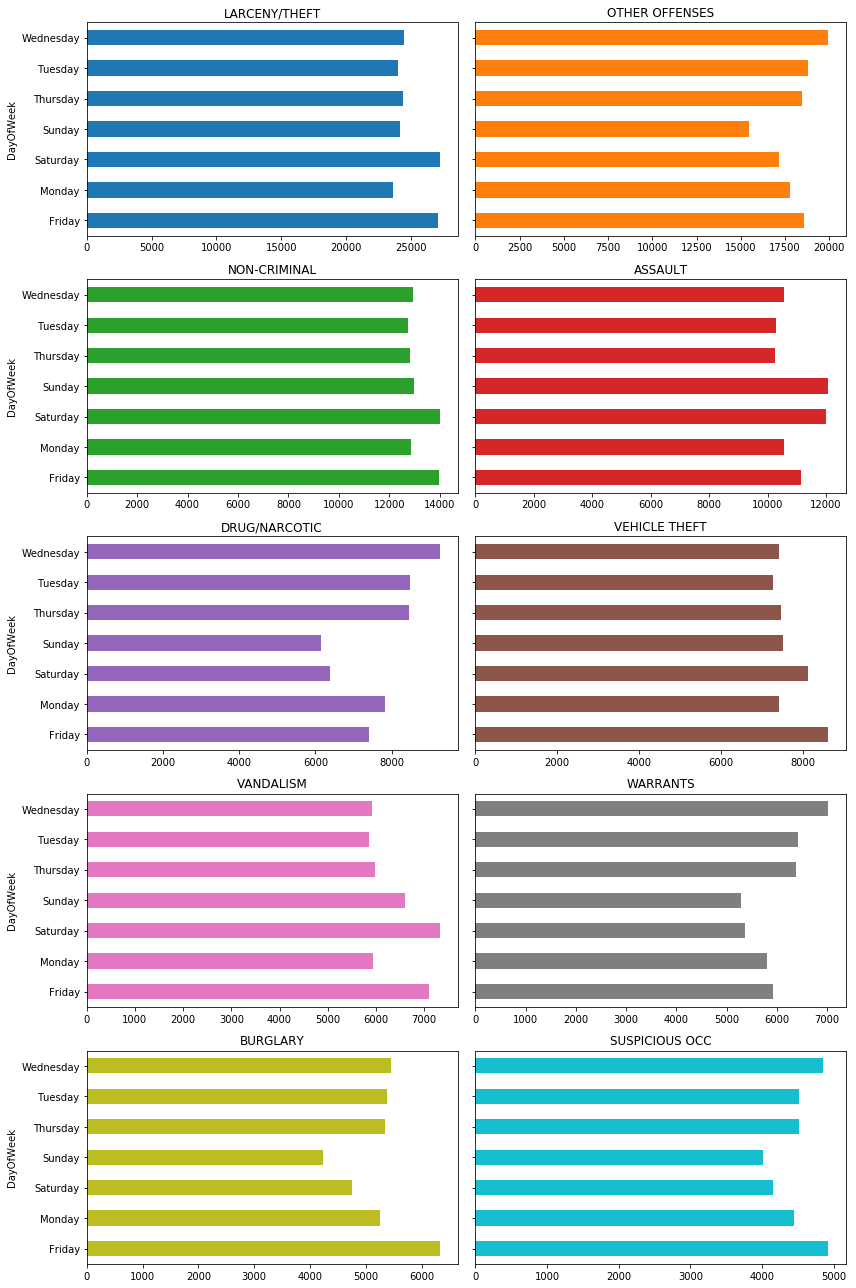

In [8]:
#Plot of 10 most committed crimes, each with the days of the week.
cross_days_and_cat.loc[:,cross_days_and_cat.sum(axis=0).nlargest(10).index].plot.barh(subplots=True, sharey=True,
                                                        sharex=False, layout=(5,2), figsize=(12,18), legend=False)
plt.tight_layout()

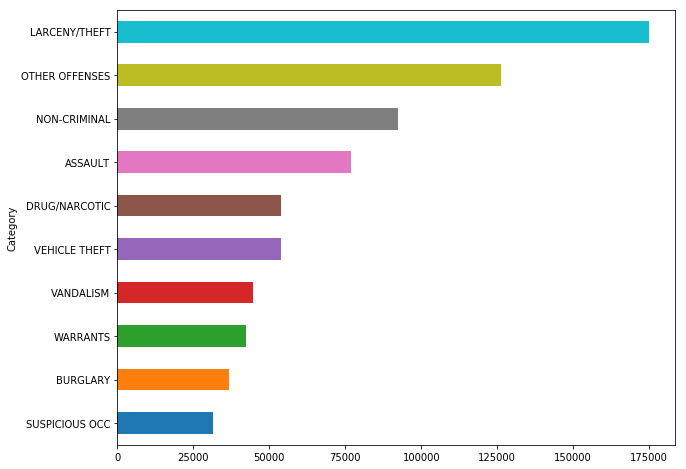

In [9]:
#Plot of 10 most committed crimes
cross_days_and_cat.sum(axis=0).nlargest(10)[::-1].plot.barh(figsize=(10,8))

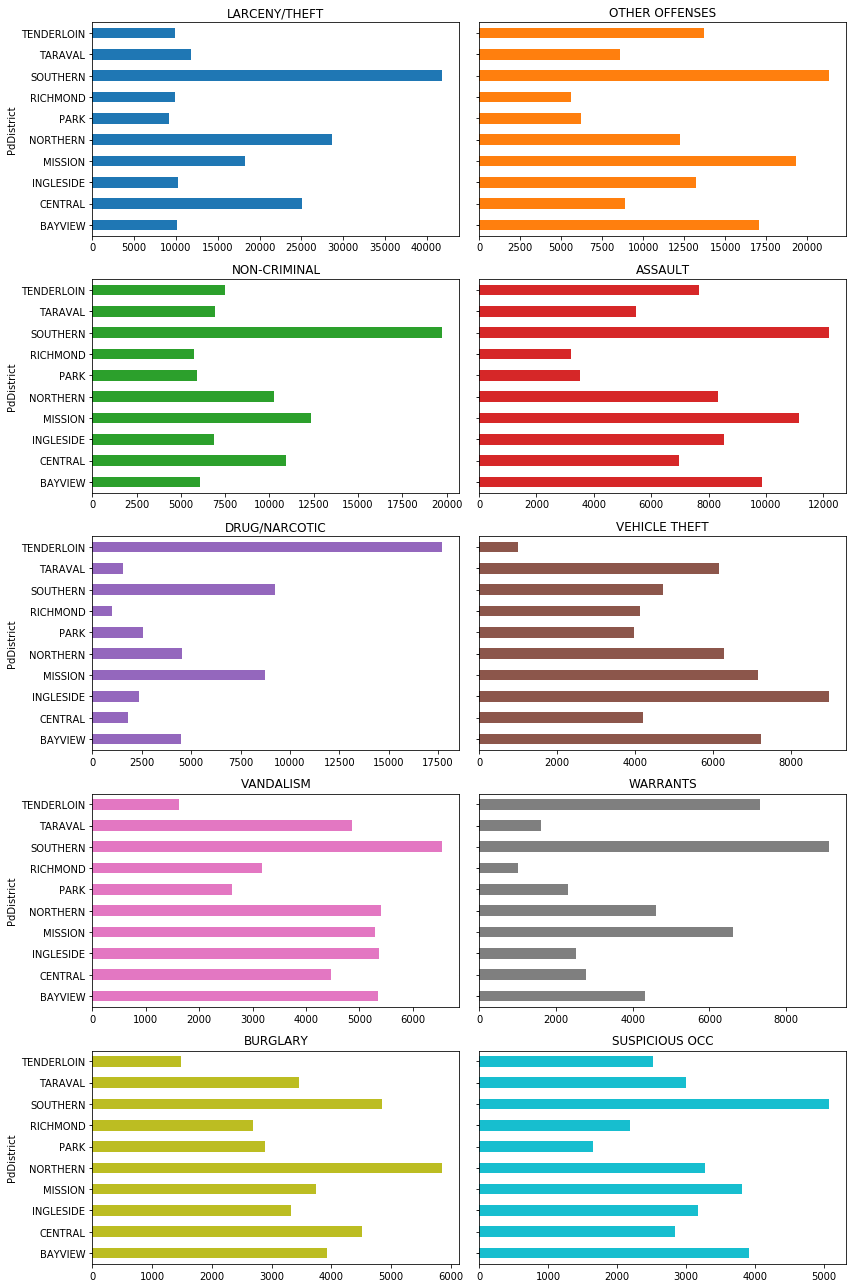

In [10]:
#Plot of 10 most committed crimes, each with the Pd Districts.
cross_pd_and_cat.loc[:,cross_pd_and_cat.sum(axis=0).nlargest(10).index].plot.barh(subplots=True, sharey=True,
                                                        sharex=False, layout=(5,2), figsize=(12,18), legend=False)
plt.tight_layout()

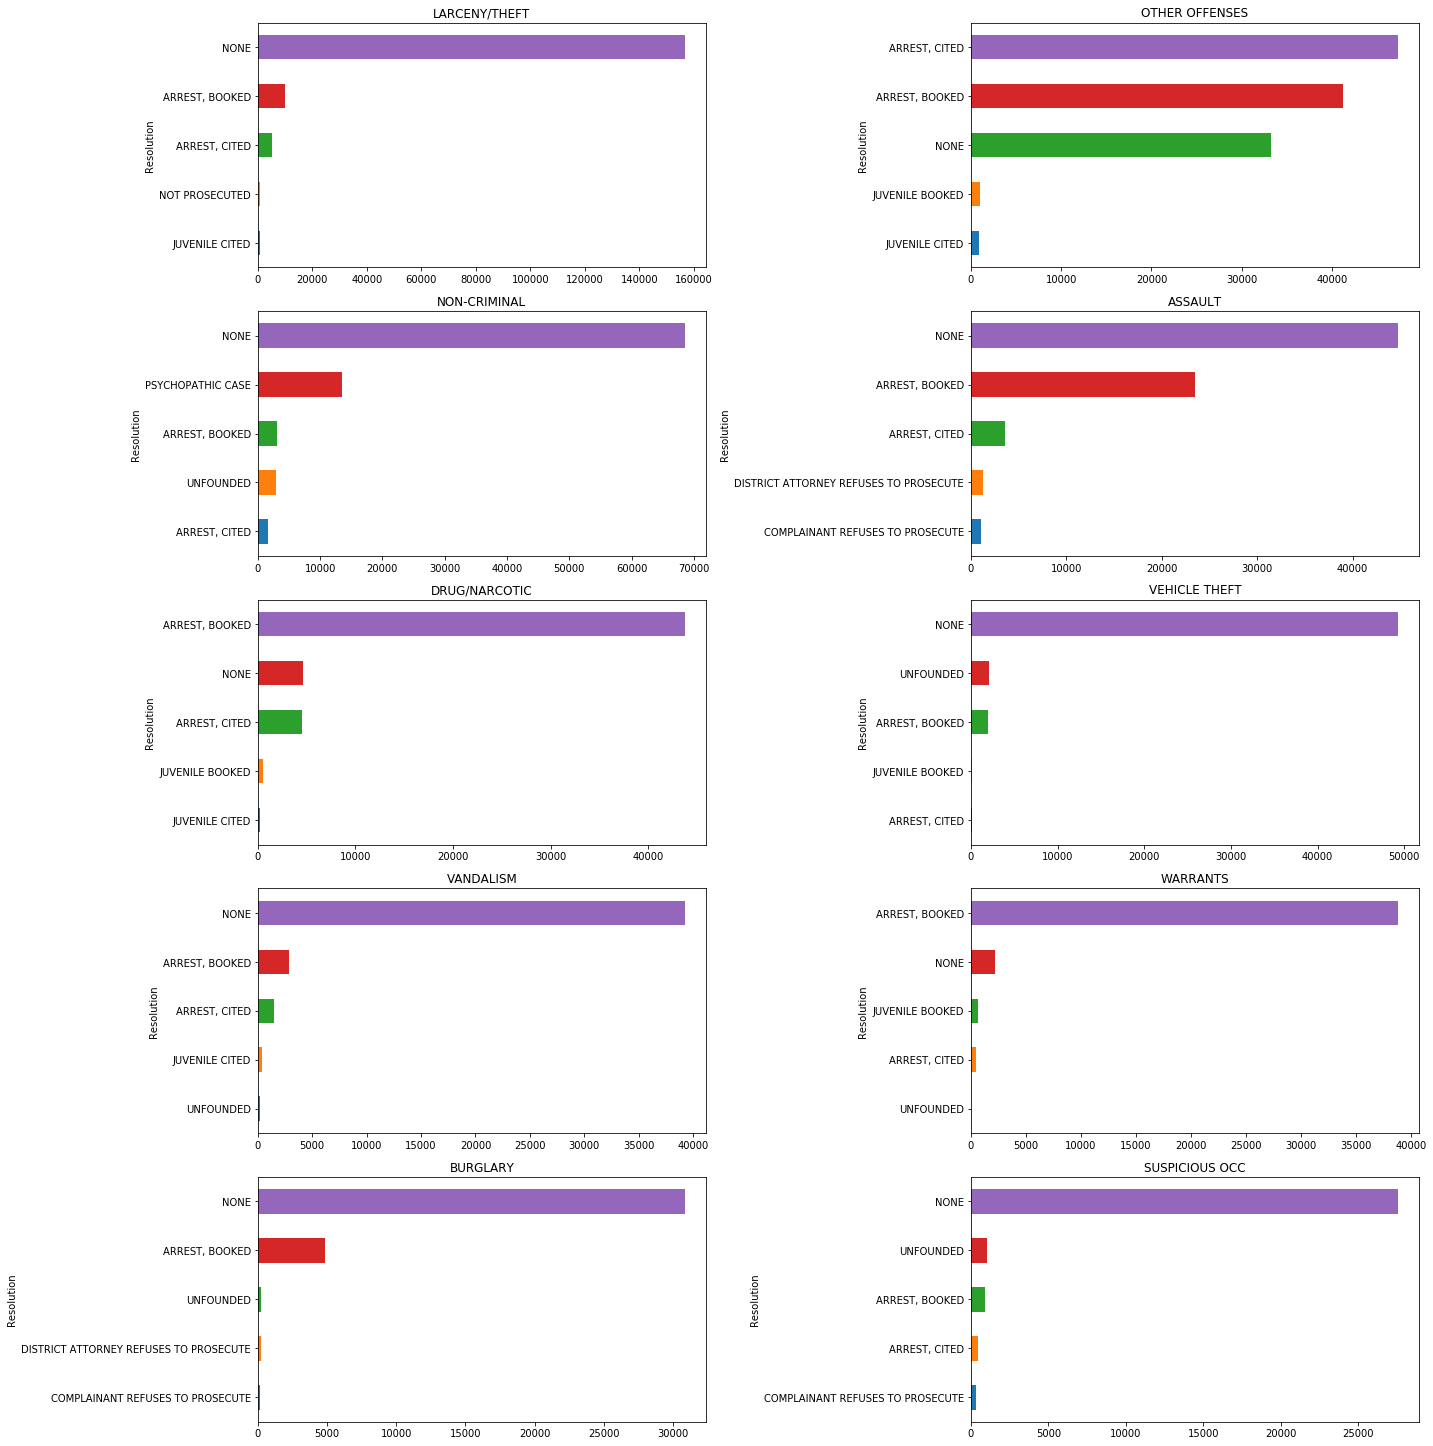

In [11]:
#Plot of 10 most committed crimes, each with the 5 topest resolution method.
fig = plt.figure()
for cat,num in zip(cross_days_and_cat.sum(axis=0).nlargest(10).index, range(1,11)):
    ax = fig.add_subplot(10,2, num)
    cross_res_and_cat.loc[:,cross_days_and_cat.sum(axis=0).nlargest(10).index].nlargest(5, columns=cat)[::-1][cat].plot.barh(ax=ax,                                                                                                                            
                                                                                                                            figsize=(20,40))
    ax.set_title(cat)
plt.tight_layout()
plt.show()